# Fitting Spatial Extension of IC443

This tutorial demonstrates how to perform a measurement of spatial extension with the [extension](http://fermipy.readthedocs.org/en/latest/advanced/extension.html) method in the [fermipy](http://fermipy.readthedocs.org) package.  This tutorial assumes that you have first gone through the [PG 1553](pg1553.ipynb) analysis tutorial.

We will study the Galactic supernova remnant IC 443, which is among the brightest and best-studied of such systems, detected as an extended gamma-ray source at both GeV and TeV energies.

## Get the Data and Setup the Analysis

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter

In this thread we will use a pregenerated data set which is contained in a tar archive in the *data* directory of the *fermipy-extra* repository.

In [2]:
if os.path.isfile('../data/ic443.tar.gz'):
    !tar xzf ../data/ic443.tar.gz
else:
    !curl -OL https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/ic443.tar.gz
    !tar xzf ic443.tar.gz

We first instantiate a GTAnalysis instance using the config file in the ic443 directory and the run the setup() method.  This will prepare all of the ancillary files and create the pylikelihood instance for binned analysis.  Note that in this example these files have already been generated so the routines that will normally be executed to create these files will be skipped.

In [5]:
gta = GTAnalysis('ic443/config.yaml')
matplotlib.interactive(True)
gta.setup()

2021-06-18 14:29:20 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.18
2021-06-18 14:29:21 INFO    GTAnalysis.setup(): Running setup.
2021-06-18 14:29:21 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2021-06-18 14:29:21 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2021-06-18 14:29:21 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/ic443_ft1.fits outfile=/Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/ft1_00.fits ra=94.30999755859375 dec=22.579999923706055 rad=4.742640687119286 tmin=239557414.0 tmax=428903014.0 emin=1000.0 emax=100000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=56 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2021-06-18 14:29:21 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version HEAD
2021

## Print the ROI model

We can print the ROI object to see a list of sources in the model along with their distance from the ROI center (offset), TS, and number of predicted counts (Npred).  Since we haven't yet fit any sources, the ts of all sources will initially be set to nan.

In [6]:
gta.print_roi()

2021-06-18 15:10:25 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0617.2+2234e  RadialGaussian LogParabola       0.000       nan      9697.1
4FGL J0616.5+2235   PointSource    PowerLaw          0.154       nan       775.6
4FGL J0618.9+2240c  PointSource    LogParabola       0.404       nan       503.8
4FGL J0620.1+2246   PointSource    PowerLaw          0.696       nan       167.4
4FGL J0614.9+2426   PointSource    PowerLaw          1.939       nan        51.9
4FGL J0609.0+2136   PointSource    LogParabola       2.141       nan       159.9
4FGL J0621.2+2512   PointSource    PLSuperExpCuto    2.783       nan       156.9
4FGL J0608.8+2034c  PointSource    PowerLaw          2.803       nan       136.7
4FGL J0609.0+2006   PointSource    LogParabola       3.130       nan       111.1
4FGL J0603.9+2159   PointSource    PowerLaw          3.1

Now we will run the optimize() method.  This method refits the spectral parameters of all sources in the ROI and gives us baseline model that we can use as a starting point for fitting the spatial extension.

In [7]:
gta.optimize()

2021-06-18 15:10:26 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['galdiff', '4FGL J0617.2+2234e', 'isodiff', '4FGL J0616.5+2235']


/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape galdiff TS:  46813.604
Fitting shape 4FGL J0617.2+2234e TS:  16575.968
Fitting shape 4FGL J0616.5+2235 TS:    160.809
Fitting shape 4FGL J0621.2+2512 TS:     96.369
Fitting shape 4FGL J0618.9+2240c TS:     82.845
Fitting shape 4FGL J0603.9+2159 TS:     44.439
Fitting shape 4FGL J0620.1+2246 TS:     35.421


2021-06-18 15:10:29 INFO    GTAnalysis.optimize(): Finished
2021-06-18 15:10:29 INFO    GTAnalysis.optimize(): LogLike: -48829.291391 Delta-LogLike: 29.964547
2021-06-18 15:10:29 INFO    GTAnalysis.optimize(): Execution time: 2.90 s


Fitting shape 4FGL J0609.0+2136 TS:     27.792


{'loglike0': -48859.25593780156,
 'loglike1': -48829.291390994025,
 'dloglike': 29.964546807532315,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

In [8]:
gta.print_roi()

2021-06-18 15:10:29 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0617.2+2234e  RadialGaussian LogParabola       0.000  19441.87      9646.6
4FGL J0616.5+2235   PointSource    PowerLaw          0.154    187.21       883.4
4FGL J0618.9+2240c  PointSource    LogParabola       0.404     96.67       536.4
4FGL J0620.1+2246   PointSource    PowerLaw          0.696     33.93       154.9
4FGL J0614.9+2426   PointSource    PowerLaw          1.939     17.65        56.1
4FGL J0609.0+2136   PointSource    LogParabola       2.141     28.61       146.2
4FGL J0621.2+2512   PointSource    PLSuperExpCuto    2.783     95.04       147.6
4FGL J0608.8+2034c  PointSource    PowerLaw          2.803     17.47        93.3
4FGL J0609.0+2006   PointSource    LogParabola       3.130      6.64        59.0
4FGL J0603.9+2159   PointSource    PowerLaw          3.1

To check the quality of the ROI model fit we can generate a residual map with the residmap method.  This will produce smoothed maps of the counts distribution and residuals (counts-model) using a given spatial kernel.  The spatial kernel can be defined with a source dictionary.  In the following example we use a PointSource with a PowerLaw index of 2.0.

In [9]:
resid = gta.residmap('ic443_roifit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2021-06-18 15:10:29 INFO    GTAnalysis.residmap(): Generating residual maps
2021-06-18 15:10:29 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2021-06-18 15:10:31 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2021-06-18 15:10:31 INFO    GTAnalysis.residmap(): Finished residual maps
2021-06-18 15:10:40 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/ic443_roifit_pointsource_powerlaw_2.00_residmap.npy
2021-06-18 15:10:40 INFO    GTAnalysis.residmap(): Execution time: 10.71 s


/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/fermipy/plotting.py:146: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  plt.register_cmap(name='ds9_b', data=ds9_b)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/fermipy/plotting.py:301: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu_r"))
  colormap.set_under(colormap(0))
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:202: MatplotlibDeprecationWarning: Passing parameters norm 

Text(0.5, 1.0, 'Excess Counts')

/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: Matplotl

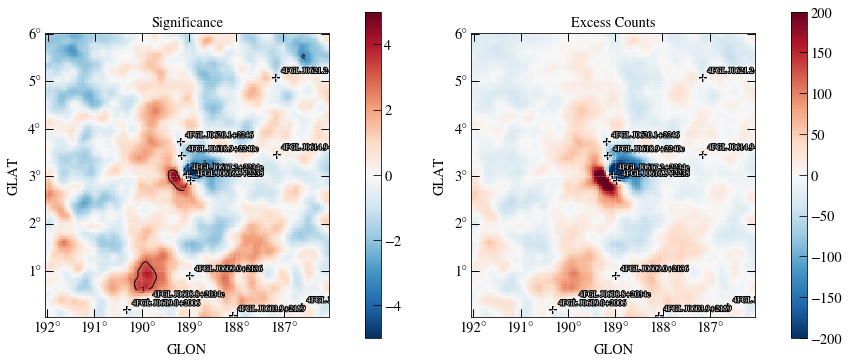

In [10]:
o = resid
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')

We can see the effect of removing sources from the model by running *residmap* with the *exclude* option.  Here we generate a residual map with the source 3FGL J0621.0+2514 removed from the model.

In [11]:
resid_noj0621 = gta.residmap('ic443_roifit_noj0621',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['4FGL J0621.2+2512'])

2021-06-18 15:10:41 INFO    GTAnalysis.residmap(): Generating residual maps
2021-06-18 15:10:41 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2021-06-18 15:10:43 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2021-06-18 15:10:43 INFO    GTAnalysis.residmap(): Finished residual maps
2021-06-18 15:10:49 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/ic443_roifit_noj0621_pointsource_powerlaw_2.00_residmap.npy
2021-06-18 15:10:49 INFO    GTAnalysis.residmap(): Execution time: 7.70 s


/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/fermipy/plotting.py:146: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  plt.register_cmap(name='ds9_b', data=ds9_b)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/fermipy/plotting.py:301: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu_r"))
  colormap.set_under(colormap(0))
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:202: MatplotlibDeprecationWarning: Passing parameters norm 

Text(0.5, 1.0, 'Excess Counts')

/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: Matplotl

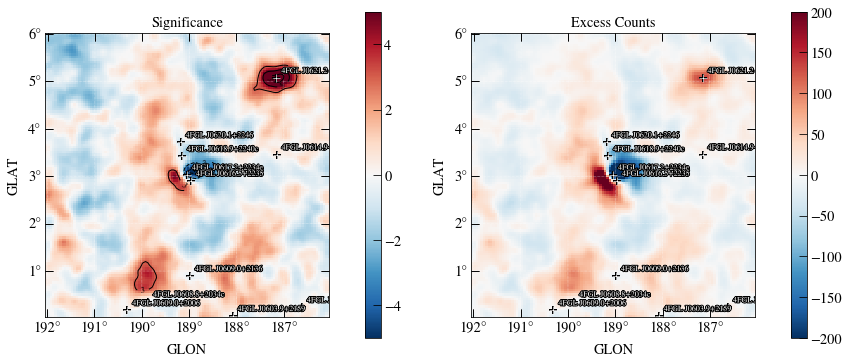

In [12]:
o = resid_noj0621
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')

We can get alternative assessment of the model by generating a TS map of the region.  Again we see a hotspot at the position of 3FGL J0621.0+2514 which we excluded from the model.

In [13]:
tsmap_noj0621 = gta.tsmap('ic443_noj0621',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['4FGL J0621.2+2512'])

2021-06-18 15:10:50 INFO    GTAnalysis.tsmap(): Generating TS map
2021-06-18 15:10:50 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2021-06-18 15:11:01 INFO    GTAnalysis.tsmap(): Finished TS map
2021-06-18 15:11:09 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/ic443_noj0621_pointsource_powerlaw_2.00_tsmap.npy
2021-06-18 15:11:09 INFO    GTAnalysis.tsmap(): Execution time: 19.24 s


/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/fermipy/plotting.py:146: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  plt.register_cmap(name='ds9_b', data=ds9_b)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/fermipy/plotting.py:301: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  colormap.set_under(colormap(0))
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:202: MatplotlibDeprecationWarning: Passing parameters norm a

Text(0.5, 1.0, 'sqrt(TS)')

/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/Users/manuelmeyer/anaconda3/envs/fermipy-1.0.1-test/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: Matplotl

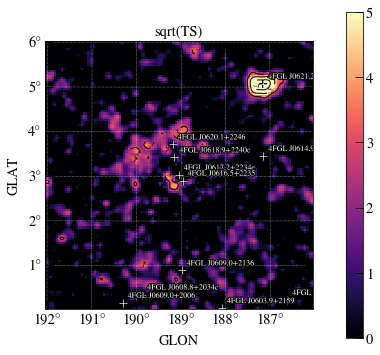

In [14]:
o = tsmap_noj0621

fig = plt.figure(figsize=(6,6))
ROIPlotter(o['sqrt_ts'],roi=gta.roi).plot(vmin=0,vmax=5,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')

## Measuring Source Extension

After optimizing the model we are ready to run an extension analysis on IC 443.  As reported in [Abdo et al. 2010](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1002.2198), this source has a spatial extension of 0.27 deg $\pm$ 0.01 (stat).  We can run an extension test of this source by calling the *extension* method with the source name.  The extension method has a number of options which can be changed at runtime by passing keyword arguments.  To see the default settings we can look at the extension sub-dictionary of the config property of our GTAnalysis instance.

In [15]:
import pprint
pprint.pprint(gta.config['extension'])

{'fit_ebin': False,
 'fit_position': False,
 'fix_shape': False,
 'free_background': False,
 'free_radius': None,
 'make_plots': False,
 'make_tsmap': True,
 'psf_scale_fn': None,
 'save_model_map': False,
 'spatial_model': 'RadialGaussian',
 'sqrt_ts_threshold': None,
 'tsmap_fitter': 'tsmap',
 'update': False,
 'width': [],
 'width_max': 1.0,
 'width_min': 0.00316,
 'width_nstep': 26,
 'write_fits': True,
 'write_npy': True}


By default the method will use a 2D Gaussian source template and scan the width parameter between 0.00316 and 1 degrees in 26 steps.  The `width` parameter can be used to provide an explicit array of points for the scan.  Since we know the extension of IC 443 is well localized around 0.27 deg we use a width array centered around this point.  The analysis results are returned as an output dictionary and are also written to the internal source object of the GTAnalysis instance.

In [16]:
ext_gauss = gta.extension('4FGL J0617.2+2234e',
                          width=np.linspace(0.25,0.30,11).tolist())
gta.write_roi('ext_gauss_fit')

2021-06-18 15:11:10 INFO    GTAnalysis.extension(): Running extension fit for 4FGL J0617.2+2234e
2021-06-18 15:11:17 INFO    GTAnalysis._extension(): Fitting extended-source model.
2021-06-18 15:11:18 INFO    GTAnalysis._extension(): Generating TS map.
2021-06-18 15:11:20 INFO    GTAnalysis._extension(): Testing point-source model.
2021-06-18 15:11:23 INFO    GTAnalysis._extension(): Best-fit extension: 0.2818 + 0.0032 - 0.0065
2021-06-18 15:11:23 INFO    GTAnalysis._extension(): TS_ext:        3212.302
2021-06-18 15:11:23 INFO    GTAnalysis._extension(): Extension UL: 0.2871
2021-06-18 15:11:23 INFO    GTAnalysis._extension(): LogLike:   -48831.343 DeltaLogLike:       -2.052
2021-06-18 15:11:23 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None}
{'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_

2021-06-18 15:11:26 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/4fgl_j0617.2+2234e_ext.npy
2021-06-18 15:11:26 INFO    GTAnalysis.extension(): Execution time: 16.60 s
2021-06-18 15:11:26 INFO    GTBinnedAnalysis.write_xml(): Writing /Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/ext_gauss_fit_00.xml...
2021-06-18 15:11:26 INFO    GTAnalysis.write_fits(): Writing /Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/ext_gauss_fit.fits...


{'name': '4FGL J0617.2+2234e', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None}, 'width': array([0.   , 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285,
       0.29 , 0.295, 0.3  ]), 'dloglike': array([6.49154941e-01, 1.58059144e+03, 1.58868267e+03, 1.59502428e+03,
       1.60040714e+03, 1.60421216e+03, 1.60588367e+03, 1.60587971e+03,
       1.6

2021-06-18 15:11:36 INFO    GTAnalysis.write_roi(): Writing /Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/ext_gauss_fit.npy...


To inspect the results of the analysis we can make a plot of the likelihood profile.  From this we can see that the spatial extension is in good agreement with the value from Abdo et al. 2010.  

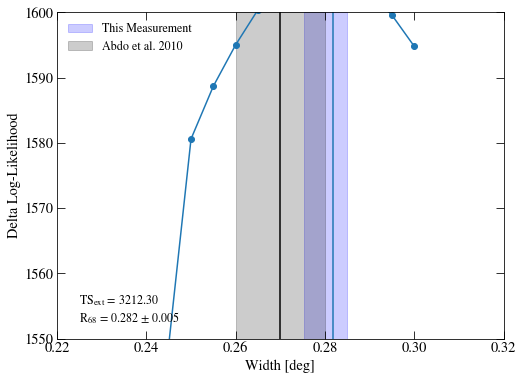

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ext_gauss['width'],ext_gauss['dloglike'],marker='o')
plt.gca().set_xlabel('Width [deg]')
plt.gca().set_ylabel('Delta Log-Likelihood')
plt.gca().axvline(ext_gauss['ext'])
plt.gca().axvspan(ext_gauss['ext']-ext_gauss['ext_err_lo'],ext_gauss['ext']+ext_gauss['ext_err_hi'],
                      alpha=0.2,label='This Measurement',color='b')

plt.gca().axvline(0.27,color='k')
plt.gca().axvspan(0.27-0.01,0.27+0.01,alpha=0.2,label='Abdo et al. 2010',color='k')
plt.gca().set_ylim(1550,1600)
plt.gca().set_xlim(0.22,0.32)

plt.annotate('TS$_{\mathrm{ext}}$ = %.2f\nR$_{68}$ = %.3f $\pm$ %.3f'%
            (ext_gauss['ts_ext'],ext_gauss['ext'],ext_gauss['ext_err']),xy=(0.05,0.05),xycoords='axes fraction')
plt.gca().legend(frameon=False)

As an additional cross-check we can look at what happens when we free sources and rerun the extension analysis.

In [18]:
ext_gauss_free = gta.extension('4FGL J0617.2+2234e',width=np.linspace(0.25,0.30,11).tolist(),free_radius=1.0)

2021-06-18 15:11:36 INFO    GTAnalysis.extension(): Running extension fit for 4FGL J0617.2+2234e
2021-06-18 15:11:48 INFO    GTAnalysis._extension(): Fitting extended-source model.
2021-06-18 15:11:53 INFO    GTAnalysis._extension(): Generating TS map.
2021-06-18 15:11:54 INFO    GTAnalysis._extension(): Testing point-source model.
2021-06-18 15:11:58 INFO    GTAnalysis._extension(): Best-fit extension: 0.2828 + 0.0033 - 0.0054
2021-06-18 15:11:58 INFO    GTAnalysis._extension(): TS_ext:        2482.970
2021-06-18 15:11:58 INFO    GTAnalysis._extension(): Extension UL: 0.2882
2021-06-18 15:11:58 INFO    GTAnalysis._extension(): LogLike:   -48832.110 DeltaLogLike:        6.055
2021-06-18 15:11:58 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': 1.0, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None}
{'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': 1.0, 'fit_ebin': False, 'update': False, 'save_model_ma

2021-06-18 15:12:01 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/manuelmeyer/Python/fermipy-extra/notebooks/ic443/4fgl_j0617.2+2234e_ext.npy
2021-06-18 15:12:01 INFO    GTAnalysis.extension(): Execution time: 25.15 s


{'name': '4FGL J0617.2+2234e', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': 1.0, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None}, 'width': array([0.   , 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285,
       0.29 , 0.295, 0.3  ]), 'dloglike': array([3.69137336e-01, 1.21590220e+03, 1.22365394e+03, 1.22976938e+03,
       1.23505079e+03, 1.23887326e+03, 1.24068079e+03, 1.24094093e+03,
       1.24

In [19]:
print('Fixed Sources: {ext:.4f} +/- {ext_err:.4f}'.format(**ext_gauss))
print('Free Sources:  {ext:.4f} +/- {ext_err:.4f}'.format(**ext_gauss_free))

Fixed Sources: 0.2818 +/- 0.0049
Free Sources:  0.2828 +/- 0.0043
